<a href="https://colab.research.google.com/github/IndraLukasTjahaja/Digital_Credit_Risk/blob/main/Lampiran_1_Fraud_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
# Lampiran 1 - Fraud Scoring

In [39]:
# L1.1 Impor data di Python

# library panda untuk menggunakan data frame
import pandas as pd

# Impor data dari excel xls ke Python
# Pembaca dapat langsung menunjuk kepada file excel yang terletak di website pendamping buku ini
# atau mengunduh terlebih dahulu dan menunjuk ke file excel di lokasi hard drive
# contoh: df = pd.read_excel('C:\User\pembaca\downloads\Credit_Scoring_Dataset.xlsx')

df = pd.read_excel('https://github.com/IndraLukasTjahaja/Digital_Credit_Risk/raw/main/Fraud_Scoring_Dataset.xlsx')

In [40]:
# L1.2 Struktur data

# Melihat sample dari dataset
df.head(10) # Menampilkan 10 baris teratas dari dataframe df

,ID,Fraud,API_Fraud_Vendor_D,API_Fraud_Vendor_C,Application_Duration,Device_Type,Device_Apps_Installed,Device_Active_Since,Mobile_Provider,Mobile_Number_Active_Since,Email_Domain_Type,GPS_di_rumah_kantor
0,DEF0001,0,102,384,4.10-20 menit,Android,6,2_1_ke_3_tahun,Telco_A,1_Kurang_1_bulan,Public_Domain: Common,1
1,DEF0002,0,84,172,3.5-10 menit,IOS,9,3_Lebih_3_tahun,Telco_A,1_Kurang_1_bulan,Public_Domain: Common,1
2,DEF0003,0,286,194,5.20 menit lebih,Android,36,3_Lebih_3_tahun,Telco_A,2_Kurang_1_tahun,Public_Domain: Common,1
3,DEF0004,0,36,318,3.5-10 menit,Android,14,3_Lebih_3_tahun,Telco_E,4_2_ke_5_tahun,Professional_Domain,1
4,DEF0005,0,162,126,2.3-5 menit,Android,10,3_Lebih_3_tahun,Telco_D,1_Kurang_1_bulan,Public_Domain: Common,1
5,DEF0006,0,198,400,2.3-5 menit,Android,5,3_Lebih_3_tahun,Telco_A,2_Kurang_1_tahun,Public_Domain: Common,1
6,DEF0007,0,111,344,4.10-20 menit,Android,37,3_Lebih_3_tahun,Telco_C,5_Lebih_5_tahun,Public_Domain: Common,0
7,DEF0008,0,36,372,4.10-20 menit,Android,35,3_Lebih_3_tahun,Telco_E,5_Lebih_5_tahun,Public_Domain: Common,1
8,DEF0009,0,15,470,2.3-5 menit,IOS,17,2_1_ke_3_tahun,Telco_A,3_1_ke_2_tahun,Public_Domain: Common,1
9,DEF0010,0,85,570,4.10-20 menit,Android,17,2_1_ke_3_tahun,Telco_C,4_2_ke_5_tahun,Public_Domain: Common,0


In [41]:
# Melihat penjelasan singkat dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          1000 non-null   object
 1   Fraud                       1000 non-null   int64 
 2   API_Fraud_Vendor_D          1000 non-null   int64 
 3   API_Fraud_Vendor_C          1000 non-null   int64 
 4   Application_Duration        1000 non-null   object
 5   Device_Type                 1000 non-null   object
 6   Device_Apps_Installed       1000 non-null   int64 
 7   Device_Active_Since         1000 non-null   object
 8   Mobile_Provider             1000 non-null   object
 9   Mobile_Number_Active_Since  1000 non-null   object
 10  Email_Domain_Type           1000 non-null   object
 11  GPS_di_rumah_kantor         1000 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 93.9+ KB


In [42]:
# Untuk melihat frekuensi dari variabel Fraud
print(df['Fraud'].value_counts())

# Untuk melihat proporsi (dalam persentase) dari variabel Fraud
print(df['Fraud'].value_counts(normalize=True) * 100)

0    950
1     50
Name: Fraud, dtype: int64
0    95.0
1     5.0
Name: Fraud, dtype: float64


In [43]:
# L1.3 Tipe data

# Merubah tipe data menjadi tipe karakter kategori
df['ID'] = df.ID.astype('category')
df['Device_Type'] = df.Device_Type.astype('category')
df['Application_Duration'] = df.Application_Duration.astype('category')
df['Device_Active_Since'] = df.Device_Active_Since.astype('category')
df['Mobile_Provider'] = df.Mobile_Provider.astype('category')
df['Mobile_Number_Active_Since'] = df.Mobile_Number_Active_Since.astype('category')
df['Email_Domain_Type'] = df.Email_Domain_Type.astype('category')
df['GPS_di_rumah_kantor'] = df.GPS_di_rumah_kantor.astype('category')

# Merubah tipe data menjadi tipe karakter int64
# Gunakan integer untuk angka bulat
df['API_Fraud_Vendor_D'] = df.API_Fraud_Vendor_D.astype('int64')
df['API_Fraud_Vendor_C'] = df.API_Fraud_Vendor_C.astype('int64')
df['GPS_di_rumah_kantor'] = df.GPS_di_rumah_kantor.astype('int64')
df['Device_Apps_Installed'] = df.Device_Apps_Installed.astype('int64')
df['Fraud'] = df.Fraud.astype('int64')

In [44]:
df_model = df[['Fraud','Device_Type','Application_Duration','Device_Active_Since','Mobile_Provider','Mobile_Number_Active_Since','Email_Domain_Type'
              ,'GPS_di_rumah_kantor','API_Fraud_Vendor_D','API_Fraud_Vendor_C','Device_Apps_Installed'
                  ]]

In [45]:
# install scorecardpy
!pip install -q scorecardpy
#!pip install git+git://github.com/shichenxie/scorecardpy.git

# Test untuk membuat model tanpa resampling

0    667
1     33
Name: Fraud, dtype: int64
0    283
1     17
Name: Fraud, dtype: int64
[INFO] creating woe binning ...
[INFO] converting into woe values ...


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


[INFO] converting into woe values ...
[[281   2]
 [ 15   2]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       283
           1       0.50      0.12      0.19        17

    accuracy                           0.94       300
   macro avg       0.72      0.56      0.58       300
weighted avg       0.92      0.94      0.93       300



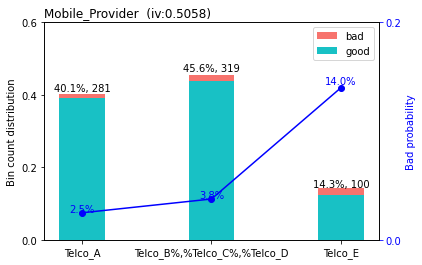

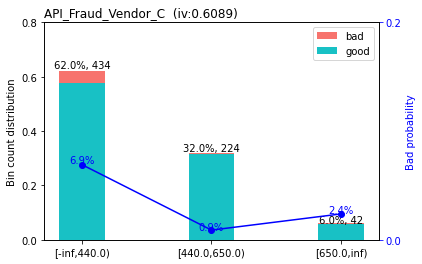

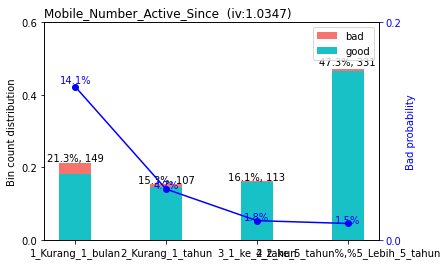

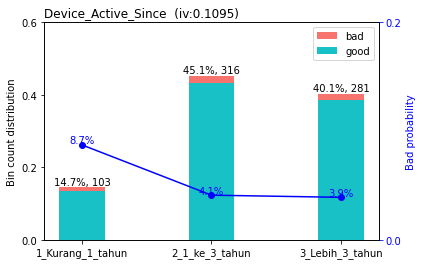

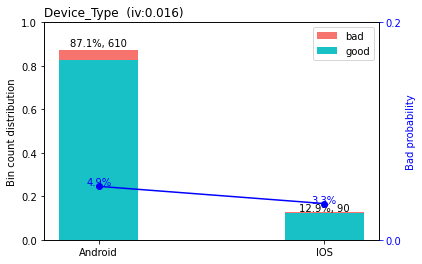

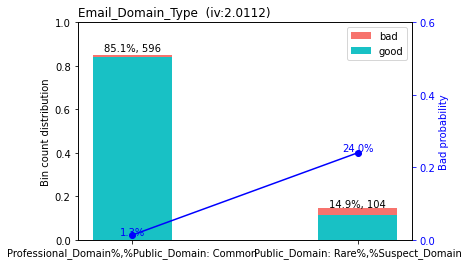

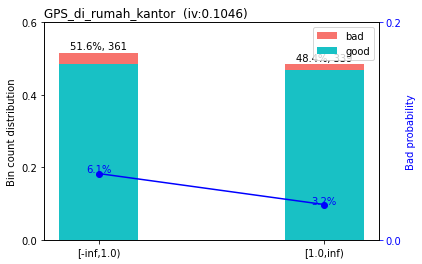

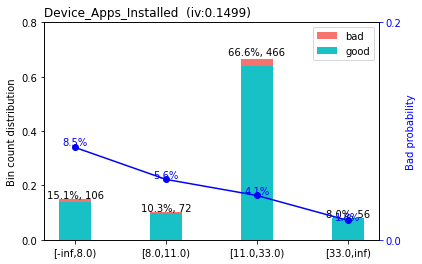

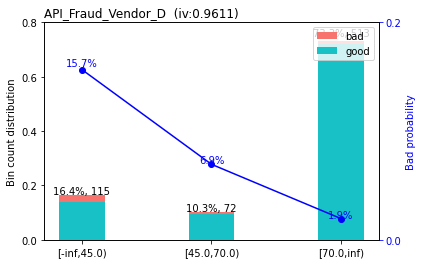

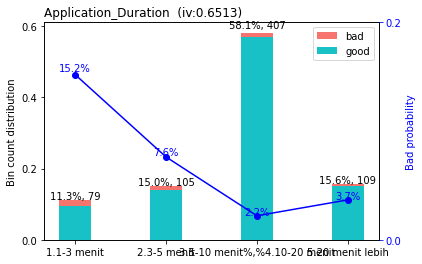

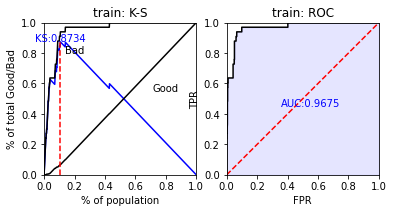

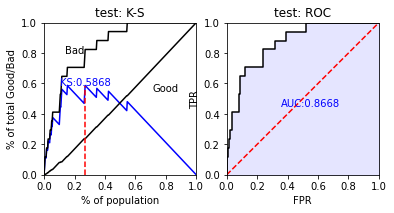

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


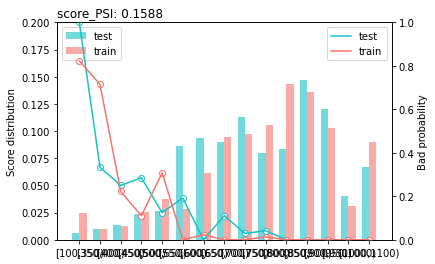

{'pic': {'score': <Figure size 432x288 with 2 Axes>},
 'psi':   variable       PSI
 0    score  0.158817}

In [46]:
# Membagi dataset menjadi development(train) dan test
y = df_model.loc[:,'Fraud']
X = df_model.loc[:,df_model.columns != 'Fraud']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
# Dalam bentuk dataframe lengkap
df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)

# Menghapus indeks dari data yang telah dibuang
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Untuk melihat frekuensi dari variabel Fraud
print(df_train['Fraud'].value_counts())
print(df_test['Fraud'].value_counts())

# Fraud Scoring using logistic regression with library scorecardpy
import scorecardpy as scpy

# Melakukan WOE binning
bins = scpy.woebin(df_train, y = 'Fraud')
scpy.woebin_plot(bins)

train = df_train
test = df_test

# converting train and test into woe values
train_woe = scpy.woebin_ply(train, bins)
test_woe = scpy.woebin_ply(test, bins)

y_train = train_woe.loc[:,'Fraud']
X_train = train_woe.loc[:,train_woe.columns != 'Fraud']
y_test = test_woe.loc[:,'Fraud']
X_test = test_woe.loc[:,train_woe.columns != 'Fraud']

# Membuat scorecard dengan menggunakan algoritma logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# predicted probability
# predicted proability
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

## Evaluasi dengan Confusion Matrix 
# Menggunakan fungsi Confusion Matrix dari sklearn
from sklearn.metrics import confusion_matrix
# Kita akan cek hasil confusion matrix antara hasil sebenarnya dengan prediksi dari model ke data test
y_pred=lr.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
# Menggunakan fungsi Classification Report dari sklearn
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

# performance ks & roc ------
train_perf = scpy.perf_eva(y_train, train_pred, title = "train")
test_perf = scpy.perf_eva(y_test, test_pred, title = "test")

# score ------
card = scpy.scorecard(bins, lr, X_train.columns, points0=600, odds0=1/20, pdo=50, basepoints_eq0=False)
# credit score
train_score = scpy.scorecard_ply(train, card, print_step=0)
test_score = scpy.scorecard_ply(test, card, print_step=0)

# psi
scpy.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)

# Test untuk membuat model dengan resampling

In [47]:
# Membagi dataset menjadi development(train) dan test
y = df_model.loc[:,'Fraud']
X = df_model.loc[:,df_model.columns != 'Fraud']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Metode resampling dengan SMOTENC yang bisa dilakukan untuk variabel angka dan teks
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[X_train.dtypes=='category'], random_state=0)
# oversampling/undersampling hanya dilakukan di data train
X_resampled, y_resampled = smote_nc.fit_resample(X_train, y_train)

# Dalam bentuk dataframe lengkap
X_resampled_df = pd.DataFrame(X_resampled, columns=list(X_train.columns))
y_resampled_df = pd.DataFrame(y_resampled, columns=['Fraud'])
df_train = pd.concat([X_resampled_df, y_resampled_df], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)

# Menghapus indeks dari data yang telah dibuang
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [48]:
# Untuk melihat frekuensi dari variabel Fraud
print(df_train['Fraud'].value_counts())

# Untuk melihat proporsi (dalam persentase) dari variabel Fraud
print(df_train['Fraud'].value_counts(normalize=True) * 100)

1    667
0    667
Name: Fraud, dtype: int64
1    50.0
0    50.0
Name: Fraud, dtype: float64


In [49]:
# Untuk melihat frekuensi dari variabel Fraud
print(df_test['Fraud'].value_counts())

# Untuk melihat proporsi (dalam persentase) dari variabel Fraud
print(df_test['Fraud'].value_counts(normalize=True) * 100)

0    283
1     17
Name: Fraud, dtype: int64
0    94.333333
1     5.666667
Name: Fraud, dtype: float64


In [50]:
df_train.info()
df_train.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334 entries, 0 to 1333
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Device_Type                 1334 non-null   object
 1   Application_Duration        1334 non-null   object
 2   Device_Active_Since         1334 non-null   object
 3   Mobile_Provider             1334 non-null   object
 4   Mobile_Number_Active_Since  1334 non-null   object
 5   Email_Domain_Type           1334 non-null   object
 6   GPS_di_rumah_kantor         1334 non-null   object
 7   API_Fraud_Vendor_D          1334 non-null   object
 8   API_Fraud_Vendor_C          1334 non-null   object
 9   Device_Apps_Installed       1334 non-null   object
 10  Fraud                       1334 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 114.8+ KB


,Device_Type,Application_Duration,Device_Active_Since,Mobile_Provider,Mobile_Number_Active_Since,Email_Domain_Type,GPS_di_rumah_kantor,API_Fraud_Vendor_D,API_Fraud_Vendor_C,Device_Apps_Installed,Fraud
0,IOS,4.10-20 menit,2_1_ke_3_tahun,Telco_E,1_Kurang_1_bulan,Suspect_Domain,0,74,188,29,1
1,Android,5.20 menit lebih,3_Lebih_3_tahun,Telco_A,3_1_ke_2_tahun,Public_Domain: Common,1,59,264,27,0
2,Android,3.5-10 menit,2_1_ke_3_tahun,Telco_D,4_2_ke_5_tahun,Professional_Domain,1,36,398,19,0
3,Android,3.5-10 menit,3_Lebih_3_tahun,Telco_A,3_1_ke_2_tahun,Public_Domain: Common,1,63,210,13,0
4,Android,4.10-20 menit,2_1_ke_3_tahun,Telco_A,2_Kurang_1_tahun,Public_Domain: Common,0,308,182,36,0
5,Android,1.1-3 menit,2_1_ke_3_tahun,Telco_A,2_Kurang_1_tahun,Public_Domain: Common,1,203,136,12,0
6,Android,4.10-20 menit,2_1_ke_3_tahun,Telco_D,3_1_ke_2_tahun,Public_Domain: Common,0,56,564,6,0
7,Android,5.20 menit lebih,3_Lebih_3_tahun,Telco_B,1_Kurang_1_bulan,Public_Domain: Common,0,125,146,24,0
8,Android,4.10-20 menit,3_Lebih_3_tahun,Telco_B,4_2_ke_5_tahun,Public_Domain: Common,0,250,528,36,0
9,Android,5.20 menit lebih,3_Lebih_3_tahun,Telco_D,5_Lebih_5_tahun,Public_Domain: Common,1,127,578,31,0


In [51]:
# SMOTE mengubah semua menjadi object. Maka harus diset variabel ulang
# Merubah tipe data menjadi tipe karakter int64
# Gunakan integer untuk angka bulat
df_train['API_Fraud_Vendor_D'] = df_train.API_Fraud_Vendor_D.astype('int64')
df_train['API_Fraud_Vendor_C'] = df_train.API_Fraud_Vendor_C.astype('int64')
df_train['GPS_di_rumah_kantor'] = df_train.GPS_di_rumah_kantor.astype('int64')
df_train['Device_Apps_Installed'] = df_train.Device_Apps_Installed.astype('int64')
df_train['Fraud'] = df_train.Fraud.astype('int64')

[INFO] creating woe binning ...


{'API_Fraud_Vendor_C': <Figure size 432x288 with 2 Axes>,
 'API_Fraud_Vendor_D': <Figure size 432x288 with 2 Axes>,
 'Application_Duration': <Figure size 432x288 with 2 Axes>,
 'Device_Active_Since': <Figure size 432x288 with 2 Axes>,
 'Device_Apps_Installed': <Figure size 432x288 with 2 Axes>,
 'Device_Type': <Figure size 432x288 with 2 Axes>,
 'Email_Domain_Type': <Figure size 432x288 with 2 Axes>,
 'GPS_di_rumah_kantor': <Figure size 432x288 with 2 Axes>,
 'Mobile_Number_Active_Since': <Figure size 432x288 with 2 Axes>,
 'Mobile_Provider': <Figure size 432x288 with 2 Axes>}

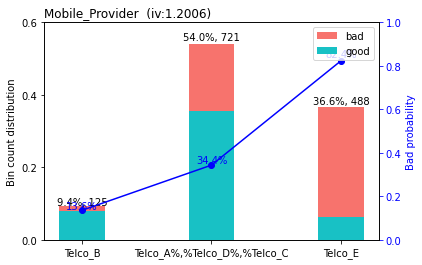

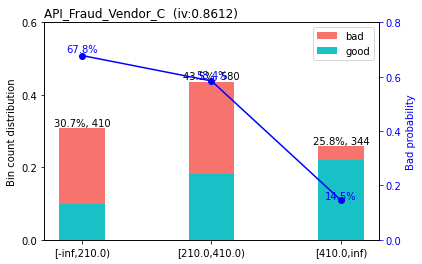

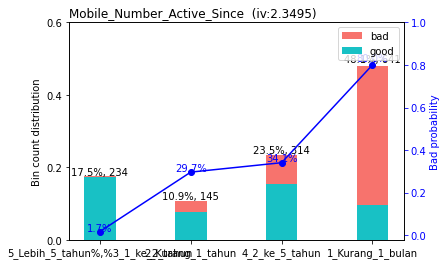

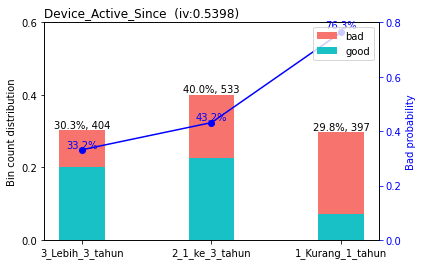

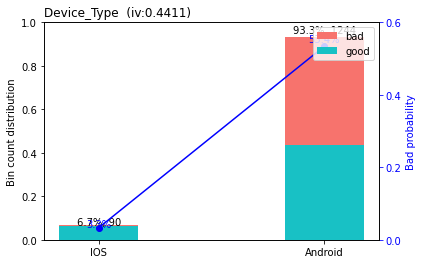

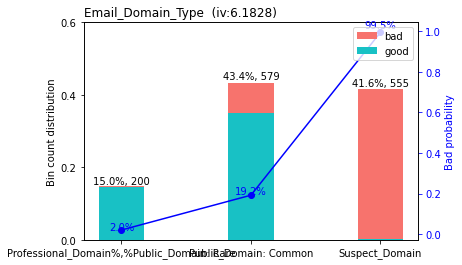

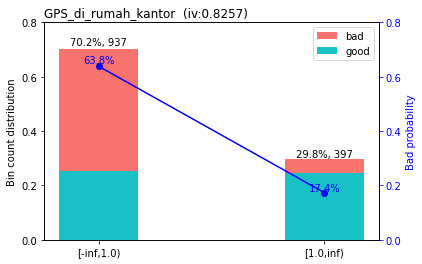

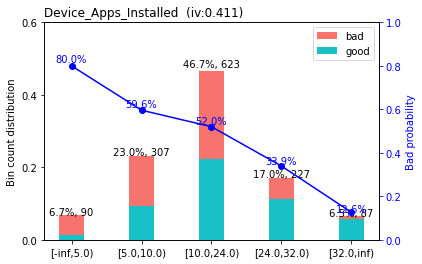

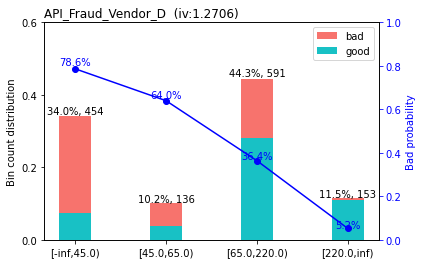

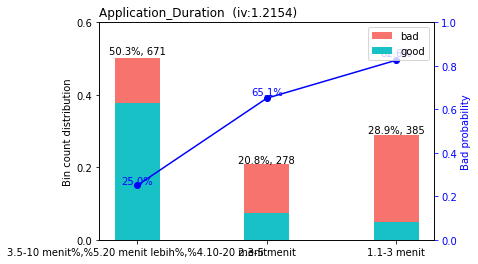

In [52]:
# Fraud Scoring using logistic regression with library scorecardpy
import scorecardpy as scpy

# Melakukan WOE binning
bins = scpy.woebin(df_train, y = 'Fraud')

scpy.woebin_plot(bins)

In [53]:
train = df_train
test = df_test

# converting train and test into woe values
train_woe = scpy.woebin_ply(train, bins)
test_woe = scpy.woebin_ply(test, bins)

y_train = train_woe.loc[:,'Fraud']
X_train = train_woe.loc[:,train_woe.columns != 'Fraud']
y_test = test_woe.loc[:,'Fraud']
X_test = test_woe.loc[:,train_woe.columns != 'Fraud']

print(X_train)
print(y_train)

[INFO] converting into woe values ...
[INFO] converting into woe values ...


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


      Mobile_Provider_woe  ...  Application_Duration_woe
0                1.542105  ...                 -1.096626
1               -0.645667  ...                 -1.096626
2               -0.645667  ...                 -1.096626
3               -0.645667  ...                 -1.096626
4               -0.645667  ...                 -1.096626
...                   ...  ...                       ...
1329             1.542105  ...                  0.623786
1330            -0.645667  ...                 -1.096626
1331             1.542105  ...                  1.557359
1332            -0.645667  ...                  0.623786
1333             1.542105  ...                  0.623786

[1334 rows x 10 columns]
0       1
1       0
2       0
3       0
4       0
       ..
1329    1
1330    1
1331    1
1332    1
1333    1
Name: Fraud, Length: 1334, dtype: int64


In [54]:
# Membuat scorecard dengan menggunakan algoritma logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

print(lr.coef_)

# For those that want to know the statistic modeling
import numpy as np
import statsmodels.api as sm

model = sm.Logit(y_train, X_train)
result = model.fit()

result.summary()

[[0.66684291 0.41703709 0.70833773 1.85272063 0.59464847 1.07199933
  1.15971675 0.7909203  1.32592089 1.41121882]]
Optimization terminated successfully.
         Current function value: 0.061343
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Fraud   No. Observations:                 1334
Model:                          Logit   Df Residuals:                     1324
Method:                           MLE   Df Model:                            9
Date:                Mon, 01 Nov 2021   Pseudo R-squ.:                  0.9115
Time:                        16:13:32   Log-Likelihood:                -81.832
converged:                       True   LL-Null:                       -924.66
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Mobile_Provider_woe                0.7377      0.218      3.383      0.001       0.310       1.165
API_Fraud_Vendor_C_woe             0.4380      0.229      1.912      0.056      -0.011       0.887
Mobile_Number_Active_Since_woe     0.7721      0.150      5.145      0.000       0.478       1.066
Device_Active_Since_woe            2.1897      0.330      6.633      0.000       1.543       2.837
Device_Type_woe                    0.6637      0.351      1.892      0.058      -0.024       1.351
Email_Domain_Type_woe              1.1623      0.144      8.089      0.000       0.881       1.444
GPS_di_rumah_kantor_woe            1.2673      0.267      4.745      0.000       0.744       1.791
Device_Apps_Installed_woe          0.8692      0.349      2.493      0.013       0.186       1.552
API_Fraud_Vendor_D_woe             1.5323      0.230      6.658      0.000       1.081       1.983
Application_Duration_woe           1.6343      0.250      6.544      0.000       1.145       2.124
==================================================================================================

Possibly complete quasi-separation: A fraction 0.48 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

[[277   6]
 [  8   9]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       283
           1       0.60      0.53      0.56        17

    accuracy                           0.95       300
   macro avg       0.79      0.75      0.77       300
weighted avg       0.95      0.95      0.95       300



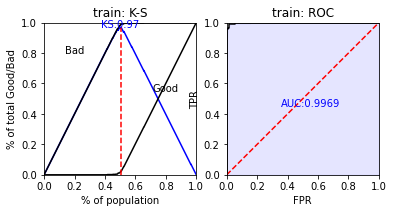

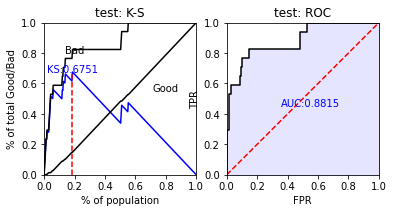

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


IndexError: ignored

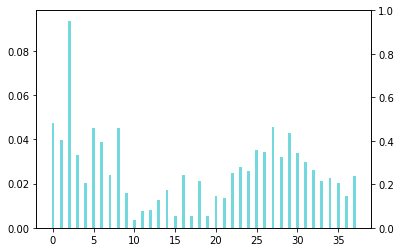

In [55]:
# predicted probability
# predicted proability
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

## Evaluasi dengan Confusion Matrix 
# Menggunakan fungsi Confusion Matrix dari sklearn
from sklearn.metrics import confusion_matrix
# Kita akan cek hasil confusion matrix antara hasil sebenarnya dengan prediksi dari model ke data test
y_pred=lr.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
# Menggunakan fungsi Classification Report dari sklearn
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

# performance ks & roc ------
train_perf = scpy.perf_eva(y_train, train_pred, title = "train")
test_perf = scpy.perf_eva(y_test, test_pred, title = "test")

# score ------
card = scpy.scorecard(bins, lr, X_train.columns, points0=600, odds0=1/20, pdo=50, basepoints_eq0=False)
# credit score
train_score = scpy.scorecard_ply(train, card, print_step=0)
test_score = scpy.scorecard_ply(test, card, print_step=0)

# psi
scpy.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)

In [59]:
# Masih menggunakan Logistic Regression
# Mengoptimalkan parameter input dalam membuat model
from sklearn.model_selection import GridSearchCV

# Set values of the grid search
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
C_grid = {'C': C_values}
# Set the amount of folds for the cross-validation
n_folds = 20
# Do a model fit over a grid of C hyperparameters
logReg = LogisticRegression(penalty='l2', random_state=7)
grid_logReg = GridSearchCV(logReg, C_grid, cv=n_folds, refit=True)
grid_logReg.fit(X_train, y_train)

# Predict based on the model
y_pred=grid_logReg.predict(X_test)

# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

# Classification report
report = classification_report(y_test, y_pred)
# cek hasil matrix
print(report)

[[277   6]
 [  8   9]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       283
           1       0.60      0.53      0.56        17

    accuracy                           0.95       300
   macro avg       0.79      0.75      0.77       300
weighted avg       0.95      0.95      0.95       300



In [60]:
# Masih menggunakan Logistic Regression
# Mengoptimalkan parameter input dalam membuat model
# Melakukan skala / scaling dari variabel input
from sklearn.model_selection import GridSearchCV

# Menggunakan scaling dengan standard scaler dari library sklearn
from sklearn.preprocessing import StandardScaler

# Memanggil fungsi standard scaler
sc = StandardScaler()

# Merubah nilai X dari Train dan Test menjadi standardisation
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.fit_transform(X_test)

# Set values of the grid search
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
C_grid = {'C': C_values}
# Set the amount of folds for the cross-validation
n_folds = 20
# Do a model fit over a grid of C hyperparameters
logReg = LogisticRegression(penalty='l2', random_state=7)
grid_logReg = GridSearchCV(logReg, C_grid, cv=n_folds, refit=True)
grid_logReg.fit(X_train_scale, y_train)

# Predict based on the model
y_pred=grid_logReg.predict(X_test_scale)

# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

# Classification report
report = classification_report(y_test, y_pred)
# cek hasil matrix
print(report)

[[134 149]
 [  2  15]]
              precision    recall  f1-score   support

           0       0.99      0.47      0.64       283
           1       0.09      0.88      0.17        17

    accuracy                           0.50       300
   macro avg       0.54      0.68      0.40       300
weighted avg       0.93      0.50      0.61       300



In [64]:
# Menggunakan model Random Forest
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

# Classification report
report = classification_report(y_test, y_pred)
# cek hasil matrix
print(report)

[[281   2]
 [ 13   4]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       283
           1       0.67      0.24      0.35        17

    accuracy                           0.95       300
   macro avg       0.81      0.61      0.66       300
weighted avg       0.94      0.95      0.94       300

